In [1]:
#https://www.getcensus.com/blog/you-should-know-introduction-to-marketing-mix-modeling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv('/content/drive/MyDrive/colab file/marketing ad campain.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Days                92 non-null     object 
 1   Internal_campaigns  92 non-null     float64
 2   Partner_campaigns   92 non-null     float64
 3   External_campaigns  92 non-null     float64
 4   sales               92 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 3.7+ KB


In [5]:
df.head()

,Days,Internal_campaigns,Partner_campaigns,External_campaigns,sales
0,8/1/2023,230.1,37.8,69.2,2210
1,8/2/2023,44.5,39.3,45.1,1040
2,8/3/2023,17.2,45.9,69.3,930
3,8/4/2023,151.5,41.3,58.5,1850
4,8/5/2023,180.8,10.8,58.4,1290


In [6]:
df.drop('Days', axis=1, inplace=True)

In [7]:
df.head()

,Internal_campaigns,Partner_campaigns,External_campaigns,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [8]:
df.isna().sum()

Internal_campaigns    0
Partner_campaigns     0
External_campaigns    0
sales                 0
dtype: int64

In [9]:
df1 = df.copy()
df1 = pd.melt(df1)
df1.head()

,variable,value
0,Internal_campaigns,230.1
1,Internal_campaigns,44.5
2,Internal_campaigns,17.2
3,Internal_campaigns,151.5
4,Internal_campaigns,180.8


<Axes: xlabel='variable', ylabel='value'>

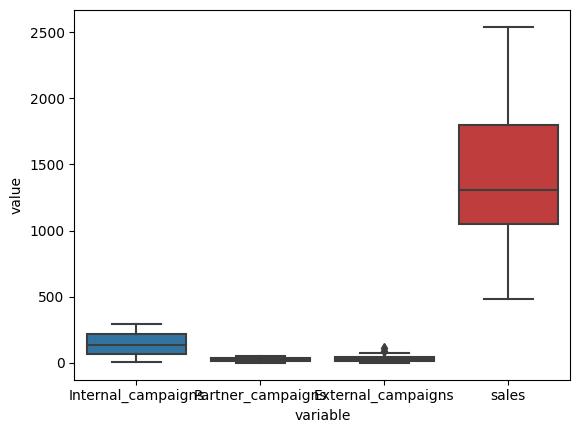

In [10]:
sns.boxplot(x='variable', y='value', data=df1)

In [11]:
df.describe()

,Internal_campaigns,Partner_campaigns,External_campaigns,sales
count,92.000000,92.000000,92.000000,92.000000
mean,143.150000,24.530435,32.211957,1420.108696
std,84.744074,14.581553,21.714556,510.465193
min,5.400000,1.400000,0.300000,480.000000
25%,69.150000,12.375000,16.450000,1047.500000
50%,135.250000,25.600000,30.650000,1305.000000
75%,215.125000,36.875000,43.750000,1800.000000
max,293.600000,49.600000,114.000000,2540.000000


<Axes: >

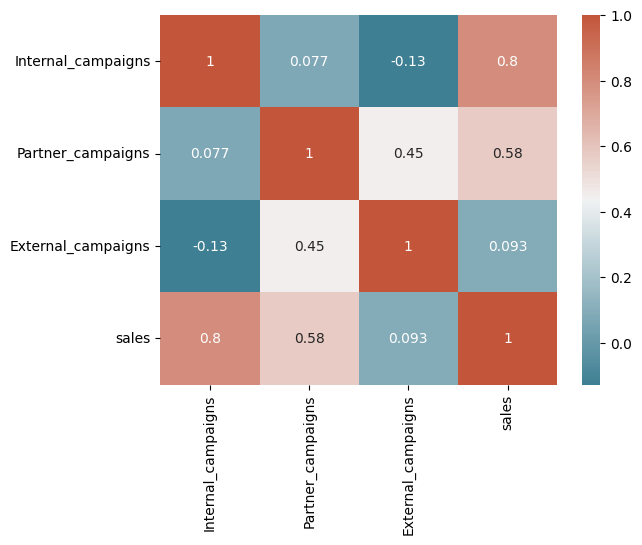

In [12]:
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

<Axes: >

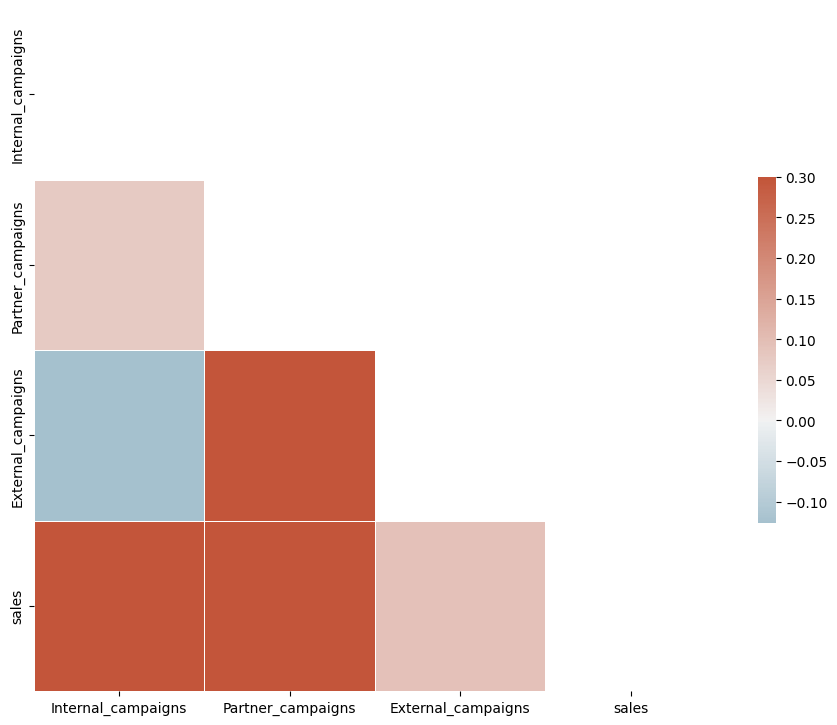

In [13]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

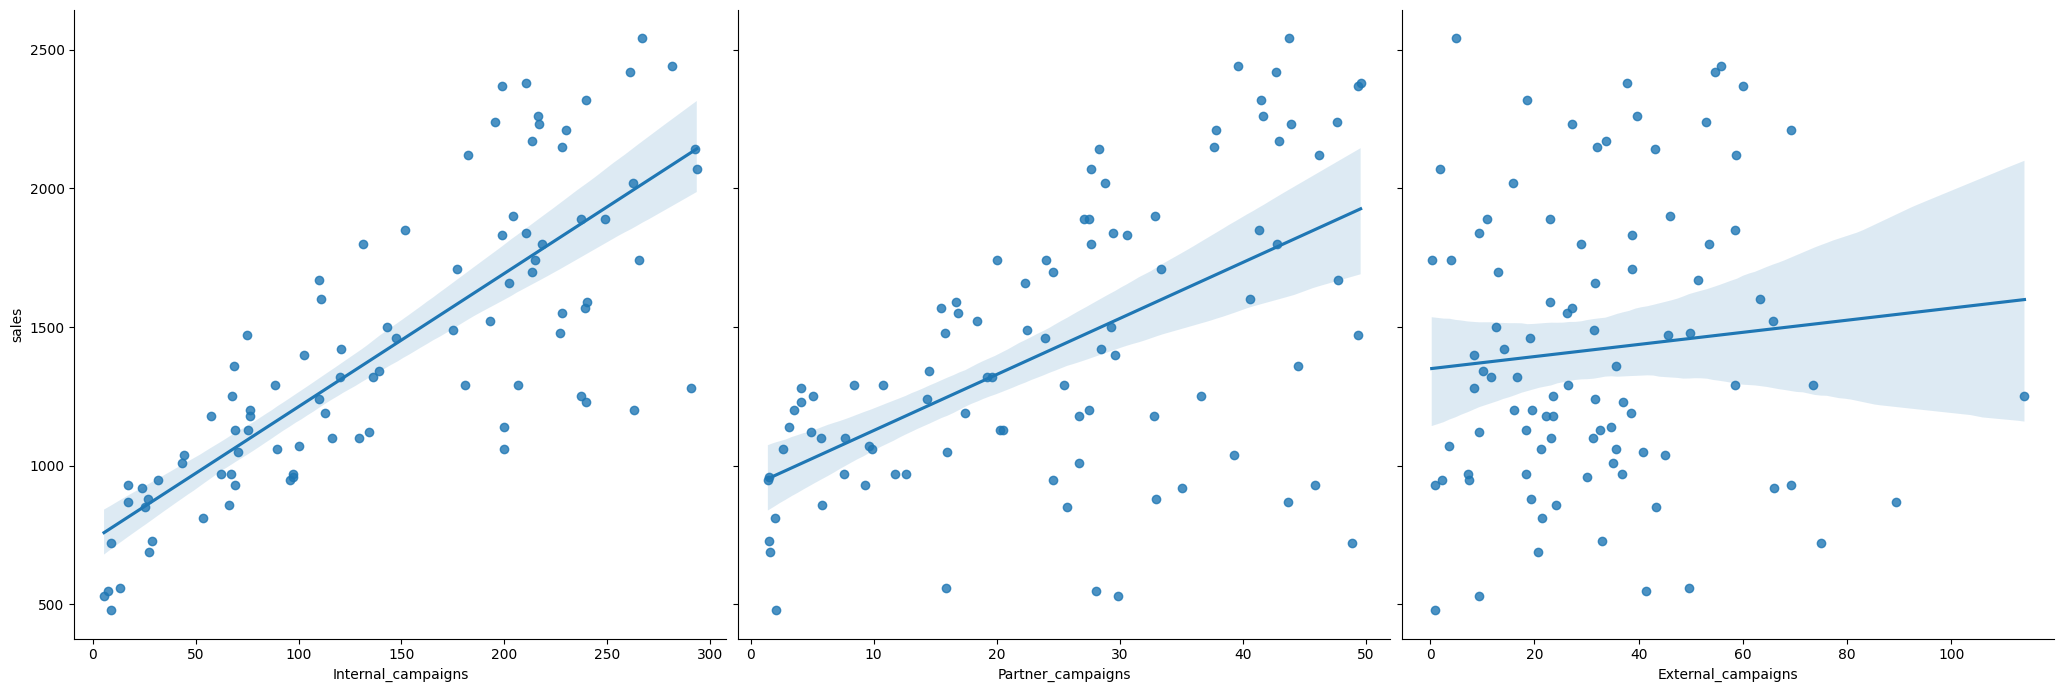

In [15]:
sns.pairplot(df, x_vars = ['Internal_campaigns','Partner_campaigns','External_campaigns'], y_vars='sales',height=7, kind='reg')

We can see from the correlation plot above, our internal advertising campaigns are highly positively correlated with sales. However, external advertising campaigns are slighly positively correlated and Partner advertising campaigns are weakly correlated. So we can conclude that among the 3 advertising campaigns, internal is the most effective platform for placing ads and increasing revenue, and partner will be our second choice.

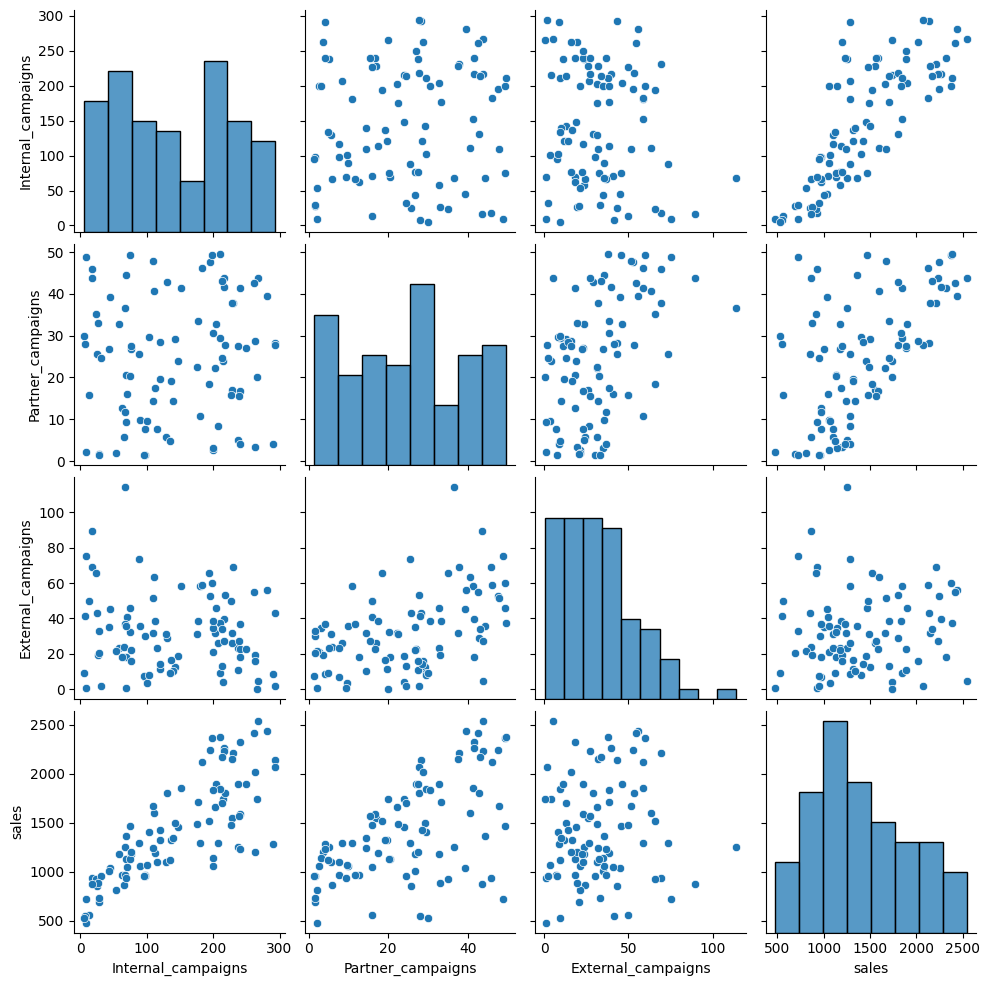

In [16]:
sns.pairplot(df)

<Axes: >

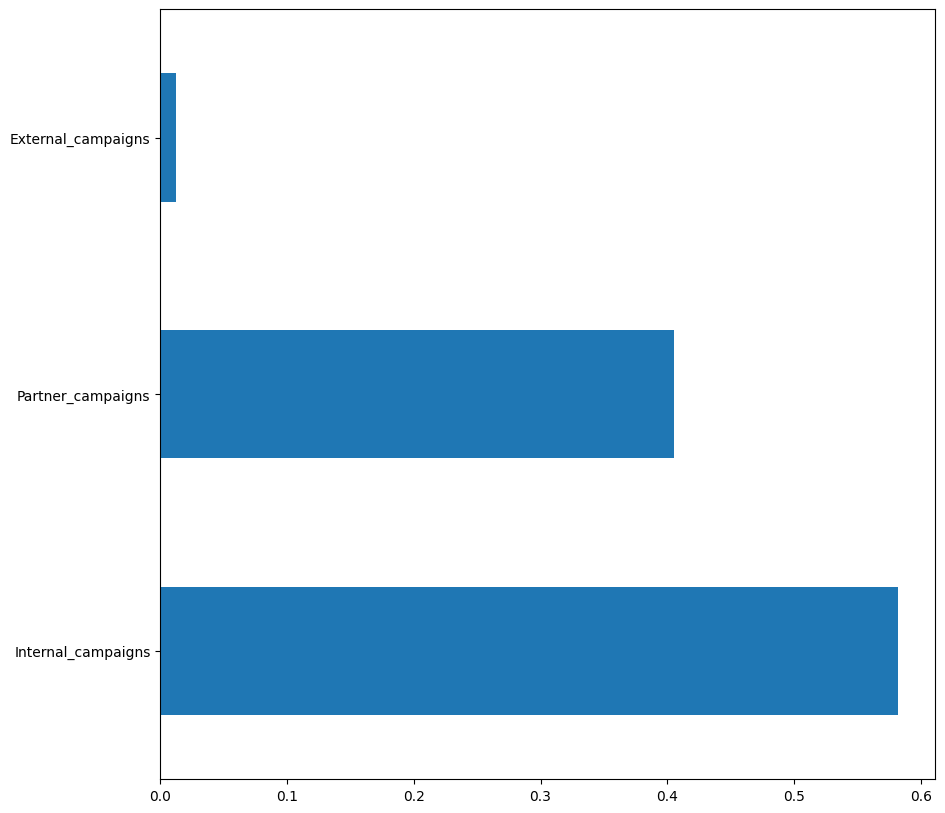

In [17]:
X = df.loc[:, df.columns != 'sales']
y = df['sales']
# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [18]:
#Building MMM
import statsmodels.formula.api as sm
model = sm.ols(formula="sales~Internal_campaigns+Partner_campaigns+External_campaigns", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     278.3
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           8.91e-45
Time:                        20:47:07   Log-Likelihood:                -595.59
No. Observations:                  92   AIC:                             1199.
Df Residuals:                      88   BIC:                             1209.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            349.9958     46

- The Adj. R-squared is 0.901. This means approximately 90% of the total variation in the data can be explained by the model. This also means the model doesn’t account for 10% of the data used — this could be due to missing variables, if, for example, there was another marketing channel that wasn’t included, or simply due to noise in the data.
- (F-statistic): 8.91e-45. Since the p-value is near zero, we know that there is at least one predictor in the model that is a good predictor of sales.
- The p-values for Internal_campaigns and External_campaigns are less than or near 0.000, but the p-value for partner is 0.86, which indicates that partner spending has no significant impact on sales. Generally.


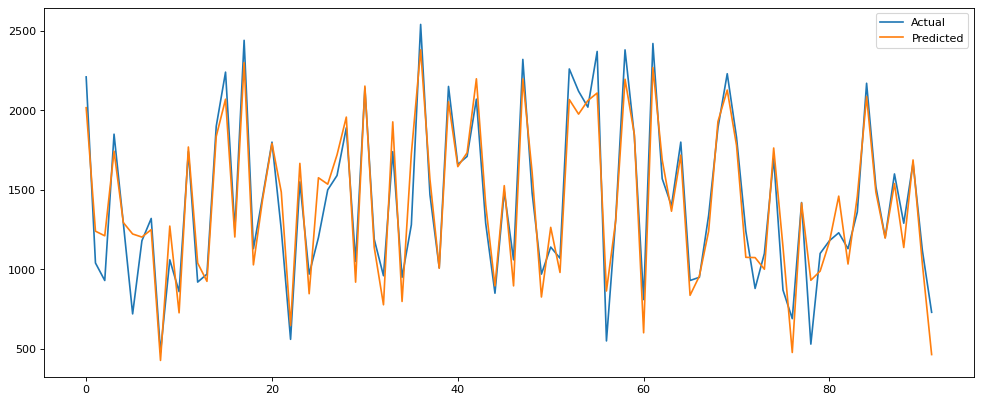

In [19]:
from matplotlib.pyplot import figure

y_pred = model.predict()
labels = df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()